# Global VLBI conversion guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 0.0.41 already installed.


## Download dataset

global (EVN+VLBA) VLBI observation with:
- 5 scans 
- 2 fields 
- 2 spw

In [2]:
import toolviper
toolviper.utils.data.download("global_vlbi_gg084b_reduced.ms")

[2024-10-14 16:10:17,017]  WARNING   toolviper:  File exists: /home/fedemp/ws_xradio_dev/venv_xradio_python312/lib/python3.12/site-packages/toolviper/utils/data/.dropbox 
[2024-10-14 16:10:17,018]     INFO   toolviper:  Updating file metadata information ...  
 

 Download List                  
 ─────────────────────────────── 
  global_vlbi_gg084b_reduced.ms

global_vlbi_gg084b_reduced.ms.zip:   0%|          | 0.00/15.0M [00:00<?, ?iB/s]

## Convert to Processing Set

In [ ]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "global_vlbi_gg084b_reduced.ms"

main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "global_vlbi_gg084b_reduced.vis.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel_mode="none",
    overwrite=True,
    main_chunksize=main_chunksize,
)

[2024-10-14 16:10:26,555]     INFO   toolviper:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBSERVATION_ID', 'FIELD_ID'] 
[2024-10-14 16:10:26,585]     INFO   toolviper:  Number of partitions: 4 
[2024-10-14 16:10:26,586]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [-1], FIELD [0], SCAN [  3 319 321 552] 
with_pointing True
[2024-10-14 16:10:27,382]  WARNING   toolviper:  Source_id is -1. No source information will be included in the field_and_source_xds. 
[2024-10-14 16:10:27,949]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [-1], FIELD [1], SCAN [320] 
with_pointing True
[2024-10-14 16:10:28,586]  WARNING   toolviper:  Source_id is -1. No source information will be included in the field_and_source_xds. 
[2024-10-14 16:10:28,817]     INFO   toolviper:  OBSERVATION_ID [0], DDI [1], STATE [-1], FIELD [0], SCAN [  3 319 321 552] 
with_pointing True
[2024-10-14 16:10:29,643]  WARNING   toolviper:  Source_id is -1. No source information will be include

## Processing Set

In [4]:
from xradio.measurement_set import open_processing_set

ps = open_processing_set(ps_store=outfile)
ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
1,global_vlbi_gg084b_reduced_0,[obs_0],"(330, 57, 32, 4)","[RR, RL, LR, LL]","[3, 319, 321, 552]",spw_0,[J1311-2329_0],[Unknown],[],"[fk5, 13h11m37.41s, -23d29m56.65s]",4.900500e+09,4.916000e+09
0,global_vlbi_gg084b_reduced_1,[obs_0],"(150, 28, 32, 4)","[RR, RL, LR, LL]",[320],spw_0,[EM170817_1],[Unknown],[],"[fk5, 13h09m48.09s, -23d22m53.35s]",4.900500e+09,4.916000e+09
3,global_vlbi_gg084b_reduced_2,[obs_0],"(330, 57, 32, 4)","[RR, RL, LR, LL]","[3, 319, 321, 552]",spw_1,[J1311-2329_0],[Unknown],[],"[fk5, 13h11m37.41s, -23d29m56.65s]",4.916000e+09,4.931500e+09
2,global_vlbi_gg084b_reduced_3,[obs_0],"(150, 28, 32, 4)","[RR, RL, LR, LL]",[320],spw_1,[EM170817_1],[Unknown],[],"[fk5, 13h09m48.09s, -23d22m53.35s]",4.916000e+09,4.931500e+09


In [5]:
ps.keys()

dict_keys(['global_vlbi_gg084b_reduced_1', 'global_vlbi_gg084b_reduced_0', 'global_vlbi_gg084b_reduced_3', 'global_vlbi_gg084b_reduced_2'])

In [6]:
ps['global_vlbi_gg084b_reduced_0']

<xarray.MeasurementSetXds> Size: 32MB
Dimensions:                     (baseline_id: 57, time: 330, frequency: 32,
                                 polarization: 4, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U2 456B dask.array<chunksize=(57,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U2 456B dask.array<chunksize=(57,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 456B 0 1 2 3 ... 53 54 55 56
    scan_number                 (time) int64 3kB dask.array<chunksize=(330,), meta=np.ndarray>
  * time                        (time) float64 3kB 1.527e+09 ... 1.527e+09
  * frequency                   (frequency) float64 256B 4.9e+09 ... 4.916e+09
  * polarization                (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 150kB dask.array<chunksize=(20, 57), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 2MB dask.array<chunksize=(20, 57, 1, 4), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 150kB dask.array<chunksize=(20, 57), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 451kB dask.array<chunksize=(20, 57, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 19MB dask.array<chunksize=(20, 57, 1, 4), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 10MB dask.array<chunksize=(20, 57, 1, 4), meta=np.ndarray>
Attributes:
    creation_date:           2024-10-14T14:10:26.630029
    data_groups:             {'base': {'correlated_data': 'VISIBILITY', 'flag...
    observation_info:        {'observer': ['GG084B'], 'project': 'GG084B', 'r...
    partition_info:          {'field_name': ['J1311-2329_0'], 'intents': ['ob...
    processor_info:          {'sub_type': '', 'type': ''}
    schema_version:          4.0.-9994
    type:                    visibility
    xradio_version:          0.0.41
    gain_curve_xds:          <xarray.Dataset> Size: 3kB\nDimensions:         ...
    antenna_xds:             <xarray.Dataset> Size: 2kB\nDimensions:         ...
    system_calibration_xds:  <xarray.Dataset> Size: 2MB\nDimensions:         ...

In [7]:
ps['global_vlbi_gg084b_reduced_0'].attrs["antenna_xds"]

<xarray.Dataset> Size: 2kB
Dimensions:                 (antenna_name: 14, cartesian_pos_label: 3,
                             receptor_label: 2)
Coordinates:
  * antenna_name            (antenna_name) <U2 112B 'BD' 'HH' 'YS' ... 'BR' 'MK'
  * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                   (antenna_name) <U16 896B dask.array<chunksize=(14,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 112B dask.array<chunksize=(14, 2), meta=np.ndarray>
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station                 (antenna_name) <U2 112B dask.array<chunksize=(14,), meta=np.ndarray>
    telescope_name          (antenna_name) <U3 168B dask.array<chunksize=(14,), meta=np.ndarray>
Data variables:
    ANTENNA_DISH_DIAMETER   (antenna_name) float64 112B dask.array<chunksize=(14,), meta=np.ndarray>
    ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 336B dask.array<chunksize=(14, 3), meta=np.ndarray>
    ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 224B dask.array<chunksize=(14, 2), meta=np.ndarray>
Attributes:
    overall_telescope_name:  EVN
    relocatable_antennas:    False
    type:                    antenna

In [8]:
ps['global_vlbi_gg084b_reduced_0'].attrs[
    "antenna_xds"
].antenna_name.values

array(['BD', 'HH', 'YS', 'SC', 'HN', 'GB', 'NL', 'FD', 'YY', 'LA', 'PT',
       'KP', 'BR', 'MK'], dtype='<U2')

In [9]:
ps[
    'global_vlbi_gg084b_reduced_0'
].baseline_antenna2_name.values

array(['BD', 'HH', 'HH', 'YS', 'SC', 'HN', 'GB', 'NL', 'FD', 'YS', 'SC',
       'HN', 'GB', 'NL', 'FD', 'SC', 'HN', 'GB', 'NL', 'FD', 'HN', 'GB',
       'NL', 'FD', 'GB', 'NL', 'FD', 'NL', 'FD', 'FD', 'YY', 'LA', 'PT',
       'KP', 'BR', 'MK', 'YY', 'LA', 'PT', 'KP', 'BR', 'MK', 'LA', 'PT',
       'KP', 'BR', 'MK', 'PT', 'KP', 'BR', 'MK', 'KP', 'BR', 'MK', 'BR',
       'MK', 'MK'], dtype='<U2')

In [10]:
ps['global_vlbi_gg084b_reduced_0'].VISIBILITY.attrs["field_and_source_xds"]

<xarray.Dataset> Size: 116B
Dimensions:             (sky_dir_label: 2)
Coordinates:
    field_name          <U12 48B ...
  * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
    source_name         <U7 28B ...
Data variables:
    FIELD_PHASE_CENTER  (sky_dir_label) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    is_ephemeris:  False
    type:          field_and_source

In [11]:
ps['global_vlbi_gg084b_reduced_0'].attrs["gain_curve_xds"]

<xarray.Dataset> Size: 3kB
Dimensions:                 (antenna_name: 14, poly_term: 3, receptor_label: 2)
Coordinates:
    antenna_id              (antenna_name) int32 56B dask.array<chunksize=(14,), meta=np.ndarray>
  * antenna_name            (antenna_name) <U2 112B 'BD' 'HH' 'YS' ... 'BR' 'MK'
    gain_curve_type         (antenna_name) <U9 504B dask.array<chunksize=(14,), meta=np.ndarray>
    mount                   (antenna_name) <U16 896B dask.array<chunksize=(14,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 112B dask.array<chunksize=(14, 2), meta=np.ndarray>
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station                 (antenna_name) <U2 112B dask.array<chunksize=(14,), meta=np.ndarray>
    telescope_name          (antenna_name) <U3 168B dask.array<chunksize=(14,), meta=np.ndarray>
Dimensions without coordinates: poly_term
Data variables:
    GAIN_CURVE              (antenna_name, poly_term, receptor_label) float64 672B dask.array<chunksize=(14, 3, 2), meta=np.ndarray>
    GAIN_CURVE_INTERVAL     (antenna_name) float64 112B dask.array<chunksize=(14,), meta=np.ndarray>
    GAIN_CURVE_SENSITIVITY  (antenna_name, receptor_label) float64 224B dask.array<chunksize=(14, 2), meta=np.ndarray>
Attributes:
    measured_date:  2018-05-26T15:33:49.500000000
    type:           gain_curve

In [12]:
ps['global_vlbi_gg084b_reduced_0'].attrs["system_calibration_xds"]

<xarray.Dataset> Size: 2MB
Dimensions:         (antenna_name: 14, time_cal: 10357, receptor_label: 2)
Coordinates:
  * antenna_name    (antenna_name) <U2 112B 'BD' 'HH' 'YS' ... 'KP' 'BR' 'MK'
  * receptor_label  (receptor_label) int64 16B 0 1
  * time_cal        (time_cal) float64 83kB 5.034e+09 5.034e+09 ... 5.034e+09
Data variables:
    TSYS            (antenna_name, time_cal, receptor_label) float64 2MB dask.array<chunksize=(7, 5179, 1), meta=np.ndarray>
Attributes:
    type:     system_calibration

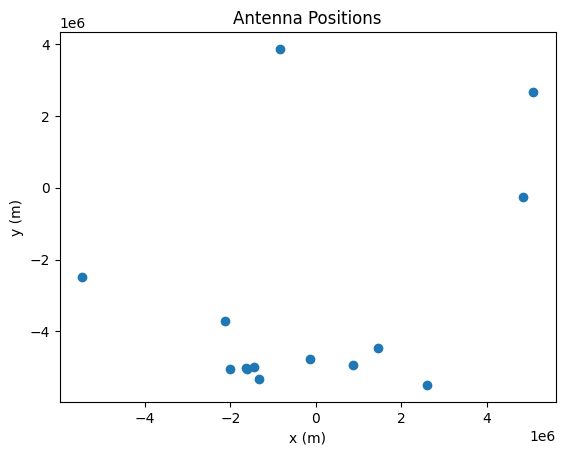

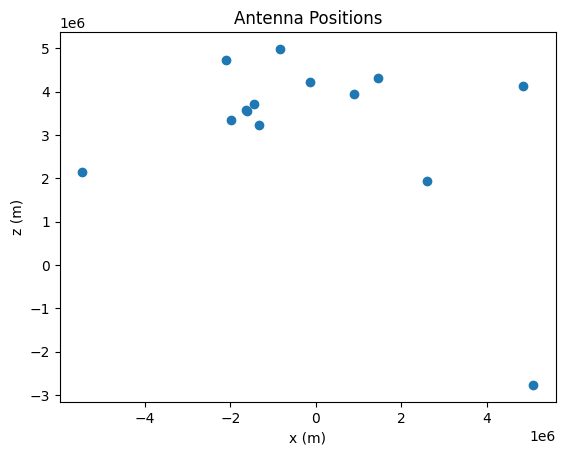

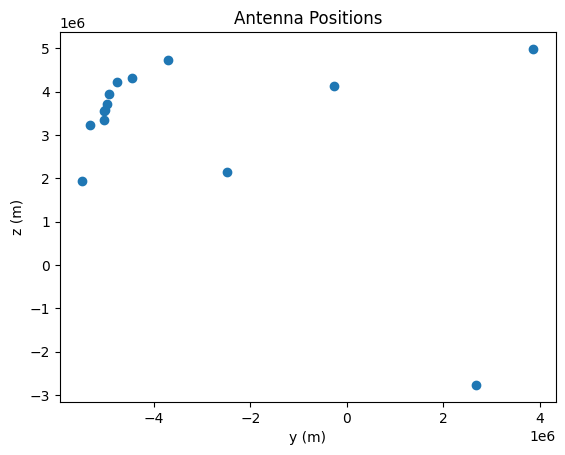

In [13]:
ps.plot_antenna_positions()

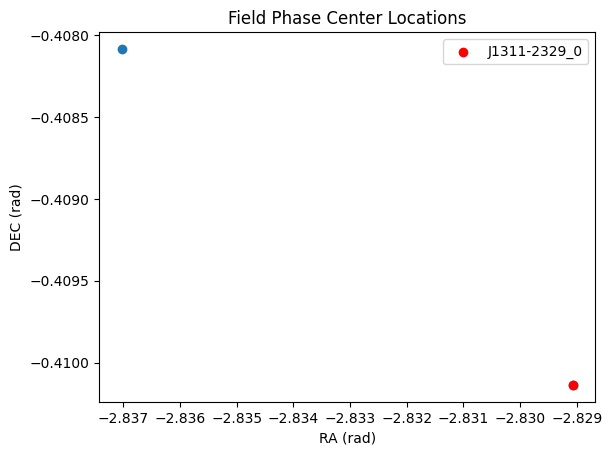

In [14]:
ps.plot_phase_centers()